In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n_simulations = 1500
n_train = 1000
n_iterations = 500

mse_results_a = np.zeros((n_iterations, 3))
mse_results_b = np.zeros((n_iterations, 3))

for i in range(n_iterations):
    x1 = np.random.normal(size=(n_simulations,))
    x2 = np.random.normal(size=(n_simulations,))
    epsilon = np.random.normal(size=(n_simulations,))

    # Model a) y = 1.5*x1 - 2*x2 + epsilon
    y_a = 1.5*x1 - 2*x2 + epsilon

    # Model b) y = 1.5*x1 - 2*x2 + epsilon if x1 < 0, otherwise y = 1.5*ln(x1) + epsilon
    y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)

    x1_train = x1[:n_train]
    x2_train = x2[:n_train]
    y_a_train = y_a[:n_train]
    y_b_train = y_b[:n_train]

    x1_test = x1[n_train:]
    x2_test = x2[n_train:]
    y_a_test = y_a[n_train:]
    y_b_test = y_b[n_train:]

    X_train = np.column_stack((x1_train, x2_train))
    X_test = np.column_stack((x1_test, x2_test))

    def ols_regression(X_train, y_train, X_test):
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        return reg.predict(X_test)

    def random_forest(X_train, y_train, X_test):
        rf = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=0)
        rf.fit(X_train, y_train)
        return rf.predict(X_test)

    def xgboost_regression(X_train, y_train, X_test):
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test)

        params = {
            'objective': 'reg:squarederror',
            'learning_rate': 0.3,
            'gamma': 0,
            'max_depth': 6
        }

        booster = xgb.train(params, dtrain, num_boost_round=20)
        return booster.predict(dtest)

    y_a_pred_ols = ols_regression(X_train, y_a_train, X_test)
    y_a_pred_rf = random_forest(X_train, y_a_train, X_test)
    y_a_pred_xgb = xgboost_regression(X_train, y_a_train, X_test)

    mse_results_a[i, 0] = np.mean((y_a_test - y_a_pred_ols) ** 2)
    mse_results_a[i, 1] = np.mean((y_a_test - y_a_pred_rf) ** 2)
    mse_results_a[i, 2] = np.mean((y_a_test - y_a_pred_xgb) ** 2)

    y_b_pred_ols = ols_regression(X_train, y_b_train, X_test)
    y_b_pred_rf = random_forest(X_train, y_b_train, X_test)
    y_b_pred_xgb = xgboost_regression(X_train, y_b_train, X_test)

    mse_results_b[i, 0] = np.mean((y_b_test - y_b_pred_ols) ** 2)
    mse_results_b[i, 1] = np.mean((y_b_test - y_b_pred_rf) ** 2)
    mse_results_b[i, 2] = np.mean((y_b_test - y_b_pred_xgb) ** 2)

<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: RuntimeWarning: invalid value encountered in log
  y_b = np.where(x1 < 0, 1.5*x1 - 2*x2 + epsilon, 1.5*np.log(x1) + epsilon)
<ipython-input-2-bed81000f021>:18: Runti

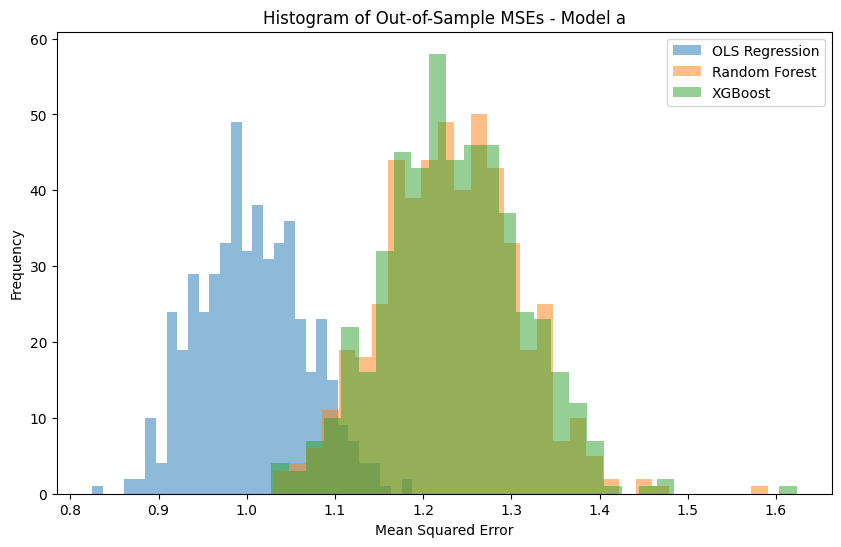

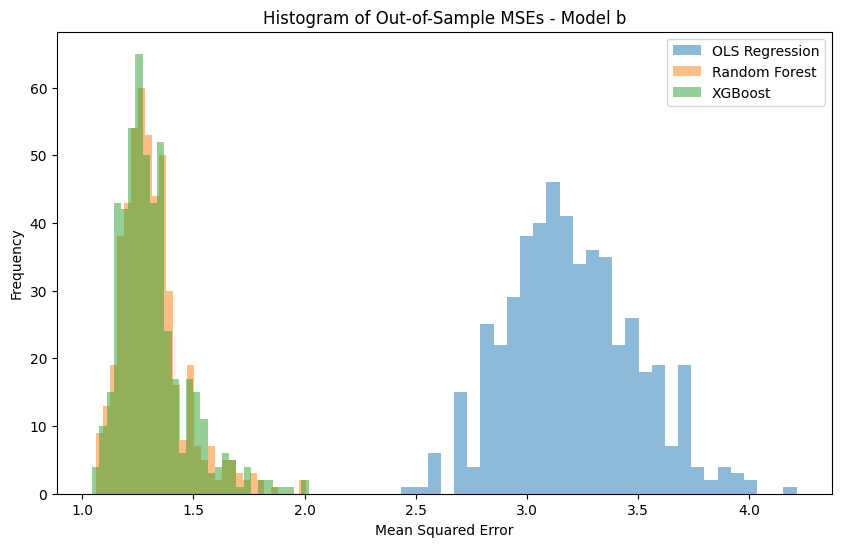

In [3]:

# Plotting the histograms
plt.figure(figsize=(10, 6))
plt.hist(mse_results_a[:, 0], bins=30, alpha=0.5, label='OLS Regression')
plt.hist(mse_results_a[:, 1], bins=30, alpha=0.5, label='Random Forest')
plt.hist(mse_results_a[:, 2], bins=30, alpha=0.5, label='XGBoost')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Histogram of Out-of-Sample MSEs - Model a')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(mse_results_b[:, 0], bins=30, alpha=0.5, label='OLS Regression')
plt.hist(mse_results_b[:, 1], bins=30, alpha=0.5, label='Random Forest')
plt.hist(mse_results_b[:, 2], bins=30, alpha=0.5, label='XGBoost')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Histogram of Out-of-Sample MSEs - Model b')
plt.legend()
plt.show()